In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

In [17]:
import yfinance as yf
start='2010-01-01'
today_date = datetime.date.today()
end = today_date.strftime('%Y-%m-%d')
df = yf.download('AAPL', start, end)

# Display the first few rows of the data
print(df.tail())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996   

              Volume  
Date                  
2024-05-20  44361300  
2024-05-21  42309400  
2024-05-22  34648500  
2024-05-23  51005900  
2024-05-24  36294600  


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-20  189.330002  191.919998  189.009995  191.039993  191.039993   
2024-05-21  191.089996  192.729996  190.919998  192.350006  192.350006   
2024-05-22  192.270004  192.820007  190.270004  190.899994  190.899994   
2024-05-23  190.979996  191.000000  186.630005  186.880005  186.880005   
2024-05-24  188.820007  190.580002  188.039993  189.979996  189.979996   

              Volume  
Date                  
2024-05-20  44361300  
2024-05-21  42309400  
2024-05-22  34648500  
2024-05-23  51005900  
2024-05-24  36294600  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461977,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358407,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800
...,...,...,...,...,...,...
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


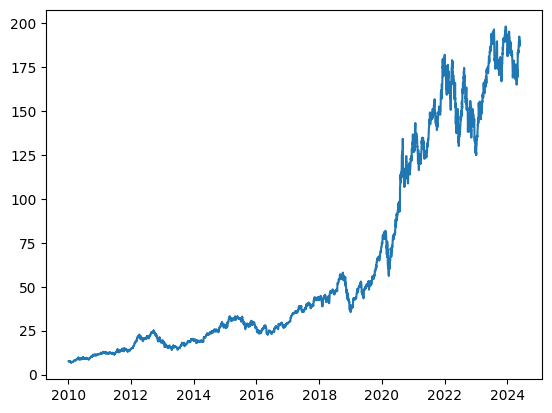

In [18]:
# Display the last few rows of the data
print(df.tail())

df.head()
#df = df.drop(['Date', 'Adj Close'], axis = 1)    #ye chnage
df.head()
plt.plot(df.Close)
df

In [20]:
ma100 = df.Close.rolling(100).mean()
print(ma100)


Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
                 ...    
2024-05-20    179.765699
2024-05-21    179.757700
2024-05-22    179.730900
2024-05-23    179.674400
2024-05-24    179.717800
Name: Close, Length: 3623, dtype: float64


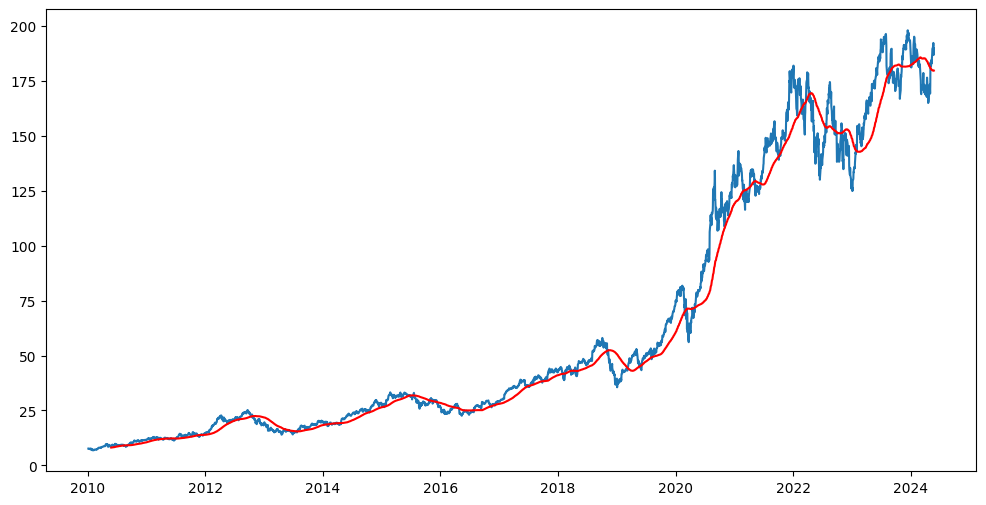

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [22]:
ma200 = df.Close.rolling(200).mean()
ma200


Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2024-05-20    180.77640
2024-05-21    180.82820
2024-05-22    180.88845
2024-05-23    180.92385
2024-05-24    180.98280
Name: Close, Length: 3623, dtype: float64

(3623, 6)

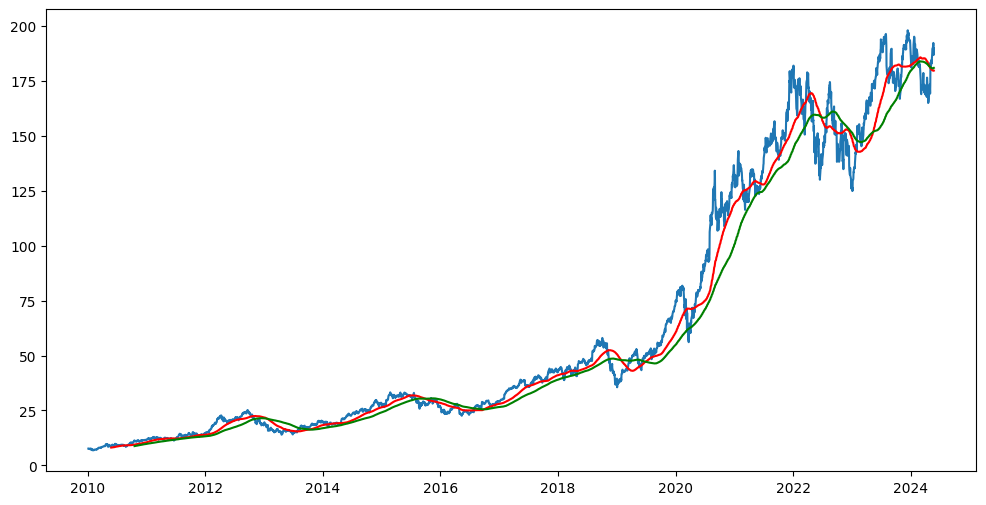

In [24]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')
df.shape

In [25]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int (len(df))])

print(data_training.shape)
print(data_testing.shape)

(2536, 1)
(1087, 1)


In [26]:
data_training.head()
data_testing.head()

,Close
Date,
2020-01-31,77.377502
2020-02-03,77.165001
2020-02-04,79.712502
2020-02-05,80.362503
2020-02-06,81.302498


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01056617],
       [0.0107442 ],
       [0.00910346],
       ...,
       [0.97760223],
       [1.        ],
       [0.99841699]])

In [28]:
x_train = []
y_train = []
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50 ,activation= 'relu' , return_sequences= True , input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60 ,activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80 ,activation= 'relu' , return_sequences= True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120 ,activation= 'relu' ))
model.add(Dropout(0.6))

model.add(Dense(units=1))

c:\Users\jeeva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model.compile(optimizer='Adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - loss: 0.0404
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 0.0058
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0046
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - loss: 0.0045
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 0.0033
Epoch 6/100
66/77 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0038

KeyboardInterrupt: 

In [ ]:
model.save('Keras_model2.h5')

In [ ]:
data_testing.head()

,Close
2534,81.084999
2535,80.967499
2536,77.377502
2537,77.165001
2538,79.712502


In [ ]:
data_training.tail()

,Close
2529,79.425003
2530,79.807503
2531,79.577499
2532,77.237503
2533,79.422501


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
final_df.head()

,Close
0,53.320000
1,53.314999
2,53.542500
3,54.174999
4,55.897499


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.45389554e-05],
       [0.00000000e+00],
       [1.57119315e-03],
       ...,
       [9.43091920e-01],
       [9.51172297e-01],
       [9.60219659e-01]])

In [ ]:
input_data.shape

(1186, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1086, 100, 1)
(1086,)


In [ ]:
#Making Predictions
y_predicted = model.predict(x_test)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [ ]:
y_predicted.shape

(1086, 1)

In [ ]:
y_test

array([0.19178839, 0.1909769 , 0.16618325, ..., 0.94309192, 0.9511723 ,
       0.96021966])

In [ ]:
y_predicted ewf

array([[0.24973604],
       [0.24970469],
       [0.24971965],
       ...,
       [0.89231724],
       [0.89902985],
       [0.9053427 ]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00690632])

In [ ]:
scale_factor = 1/0.00690632
scaler.inverse_transform(y_predicted)
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

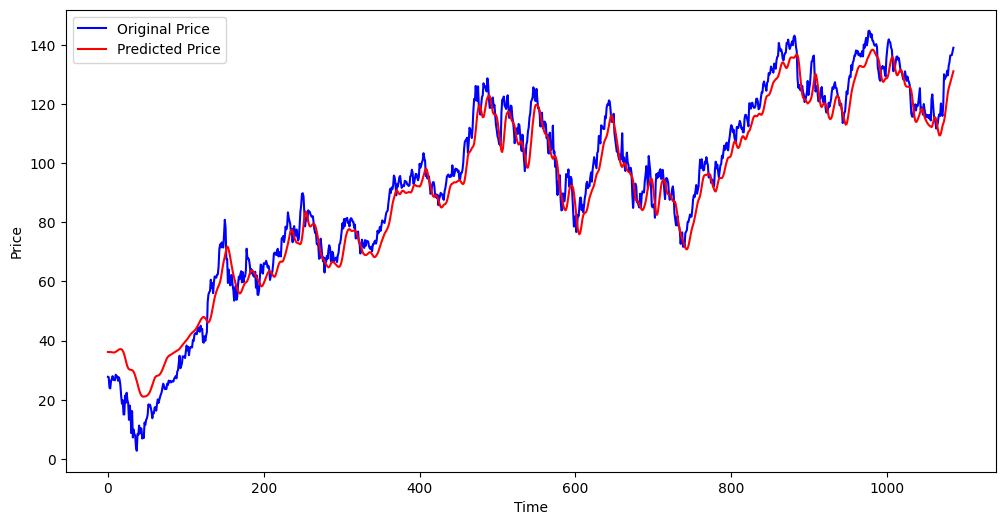

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()